In [1]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Importing the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
df=pd.read_csv('Skyserver.csv')
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [3]:
#Checking the shape of dataset
df.shape

(10000, 18)

Observation:
    
    There are ten thousand rows and 18 columns present in our dataset.

In [4]:
#Checking the columns
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [5]:
#Checking the datatype of columns

df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

Observation:
    
    1-class column is in object data types which is our target column.
    
    2-Rest of the columns are numeric data type i.e. int or float.+

In [6]:
#Checking the information of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
objid        10000 non-null float64
ra           10000 non-null float64
dec          10000 non-null float64
u            10000 non-null float64
g            10000 non-null float64
r            10000 non-null float64
i            10000 non-null float64
z            10000 non-null float64
run          10000 non-null int64
rerun        10000 non-null int64
camcol       10000 non-null int64
field        10000 non-null int64
specobjid    10000 non-null float64
class        10000 non-null object
redshift     10000 non-null float64
plate        10000 non-null int64
mjd          10000 non-null int64
fiberid      10000 non-null int64
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


Observation:
    
    1-Categorical columns: class
        
    2-Numeric columns:
        
        a-Float data types : [objid, ra, dec, u, g, r, i, z, specobjid, redshift]
            
        b-Integer data types: [run, rerun, camcol, field, plate, mjd, fiberid]
        
     3-No missing value is present.

## To check the missing value

In [7]:
#Checking if any missing value is present
df.isnull().values.any()

False

It shows that no missing value is present in any rows.

In [8]:
#Now check for columns where missing values are present.
df.isnull().any()

objid        False
ra           False
dec          False
u            False
g            False
r            False
i            False
z            False
run          False
rerun        False
camcol       False
field        False
specobjid    False
class        False
redshift     False
plate        False
mjd          False
fiberid      False
dtype: bool

False condition shows that there is no missing value is present in our dataset.

In [9]:
#Now checking the Number of missing value present
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

Although we know that no missing values is present in our dataset yet we see it by using sum() function. 

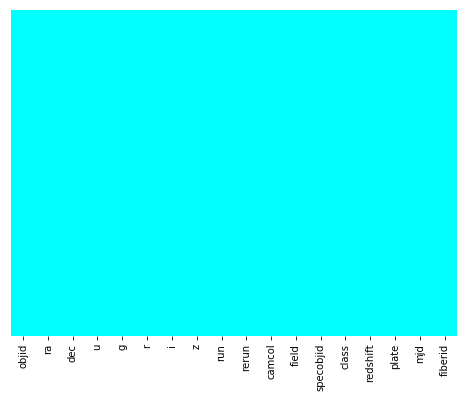

In [10]:
#Seeing it via heatmap(visualization)

plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='cool')
plt.show()

Observation:
    
    Here we see it via visualization.

### Note: Before moving further lets rename some column name for our ease.

In [11]:
#Checking the columns
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [12]:
#Renaming the columns
df=df.rename(columns={'ra':'r_ascension', 'dec': 'declination', 'u': 'u_band',
                        'g': 'g_band', 'r': 'r_band', 'i': 'i_band', 'z': 'z_band',
                        'camcol': 'camera_col'})

In [13]:
df.columns

Index(['objid', 'r_ascension', 'declination', 'u_band', 'g_band', 'r_band',
       'i_band', 'z_band', 'run', 'rerun', 'camera_col', 'field', 'specobjid',
       'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [14]:
#Takinh random samples
df.sample(5)

,objid,r_ascension,declination,u_band,g_band,r_band,i_band,z_band,run,rerun,camera_col,field,specobjid,class,redshift,plate,mjd,fiberid
2958,1.237650e+18,164.882757,-0.041692,18.98675,18.63113,18.44239,18.33936,18.11911,756,301,3,328,3.119500e+17,GALAXY,0.018994,277,51908,275
447,1.237650e+18,162.670124,-0.874412,19.07583,17.58162,16.95899,16.70053,16.53613,756,301,1,313,2.881190e+18,STAR,0.001076,2559,54208,51
9574,1.237650e+18,124.413312,45.541215,18.97779,18.62420,18.36406,18.09467,18.12583,1345,301,2,111,7.183400e+18,QSO,1.511881,6380,56340,566
3444,1.237650e+18,179.798359,-1.707060,17.58636,16.55747,16.23842,16.09514,15.98957,1140,301,5,180,3.727770e+17,GALAXY,0.020342,331,52368,380
1580,1.237650e+18,168.361539,-0.533836,19.46410,18.00401,17.50450,17.19832,17.03392,756,301,2,351,3.130170e+17,GALAXY,0.054632,278,51900,61


## Dropping some columns

In [15]:
#Creating the copy of origional dataset.
df1=df.copy()
df1.columns

Index(['objid', 'r_ascension', 'declination', 'u_band', 'g_band', 'r_band',
       'i_band', 'z_band', 'run', 'rerun', 'camera_col', 'field', 'specobjid',
       'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

Observation:
    
    The table results from a query which joins two tables (actuaclly views): "PhotoObj" which contains photometric data
    
    and "SpecObj" which contains spectral data.

In [16]:
print("Distinct objid: %d" %len(df.objid.unique()))

print("Distinct specobjid: %d" %len(df.specobjid.unique()))

Distinct objid: 1
Distinct specobjid: 6349


Observation 1:
     
        IDs in the first table are not distinct whereas some IDs in the second are unique. Reason for this is not given,
        
        but I am assuming that every row is a different and unique sample and so I can discard those columns without any
        
        problem.

Observation 2:
    
     The features 'run', 'rerun', 'camera_col' and 'field' are values which describe portions of the camera
    
     right when mentioning the objective fact.

        
The run number, which identifies the specific scan.

The camera column, or "camcol," a number from 1 to 6, identifying the scanline within the run.

The field number typically starts at 11 (after an initial rampup time), and can be as large as 800 for particularly long runs.

The SDSS spectrograph uses optical fibers to direct the light at the focal plane from individual objects to the slithead. Each object is assigned a corresponding fiberID.

Thats why we can drop all these features.

In [17]:
#Dropping the columns.
df1.drop(columns=['run', 'rerun', 'camera_col', 'field', 'objid', 'specobjid', 'fiberid'], axis = 1, inplace= True)
df1.head(3)

,r_ascension,declination,u_band,g_band,r_band,i_band,z_band,class,redshift,plate,mjd
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,STAR,-0.000009,3306,54922
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,STAR,-0.000055,323,51615
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,GALAXY,0.123111,287,52023


## Summary Statistics

In [18]:
df1.describe()

,r_ascension,declination,u_band,g_band,r_band,i_band,z_band,redshift,plate,mjd
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,0.143726,1460.986400,52943.533300
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,0.388774,1788.778371,1511.150651
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,-0.004136,266.000000,51578.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,0.000081,301.000000,51900.000000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,0.042591,441.000000,51997.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,0.092579,2559.000000,54468.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,5.353854,8410.000000,57481.000000


Observation:
    
    1-The difference between 75% and maximum is high in declination, r_band, i_band, redshift, plate column. So  outliers 
    
      are present in these columns.
        
    2-Mean is higher than median in declination, plate, mjd columns. So for these columns data is right skewed.
    
    3-Median is higher than mean in r_ascension column. So for this column data is left skewed.

## Exploring data variables

In [19]:
df1['class'].unique()

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

In [20]:
df1['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

## To check the correlation

In [21]:
df1_cor=df1.corr()
df1_cor

,r_ascension,declination,u_band,g_band,r_band,i_band,z_band,redshift,plate,mjd
r_ascension,1.000000,0.003596,0.031238,0.043909,0.047103,0.045731,0.042950,0.030307,-0.095329,-0.086887
declination,0.003596,1.000000,0.035279,0.061875,0.063404,0.058292,0.056870,0.067021,0.088342,0.066147
u_band,0.031238,0.035279,1.000000,0.849232,0.692379,0.602630,0.551483,0.163741,-0.129430,-0.168793
g_band,0.043909,0.061875,0.849232,1.000000,0.958106,0.907419,0.879622,0.407576,-0.054981,-0.092772
r_band,0.047103,0.063404,0.692379,0.958106,1.000000,0.977672,0.969197,0.441080,0.019787,-0.009345
i_band,0.045731,0.058292,0.602630,0.907419,0.977672,1.000000,0.981507,0.431450,0.072958,0.050896
z_band,0.042950,0.056870,0.551483,0.879622,0.969197,0.981507,1.000000,0.424034,0.112397,0.095658
redshift,0.030307,0.067021,0.163741,0.407576,0.441080,0.431450,0.424034,1.000000,-0.038091,-0.057957
plate,-0.095329,0.088342,-0.129430,-0.054981,0.019787,0.072958,0.112397,-0.038091,1.000000,0.966881
mjd,-0.086887,0.066147,-0.168793,-0.092772,-0.009345,0.050896,0.095658,-0.057957,0.966881,1.000000


Here we can see the correlation between the columns.

For Better understanding we can see it via visualization(with the help of heatmap).

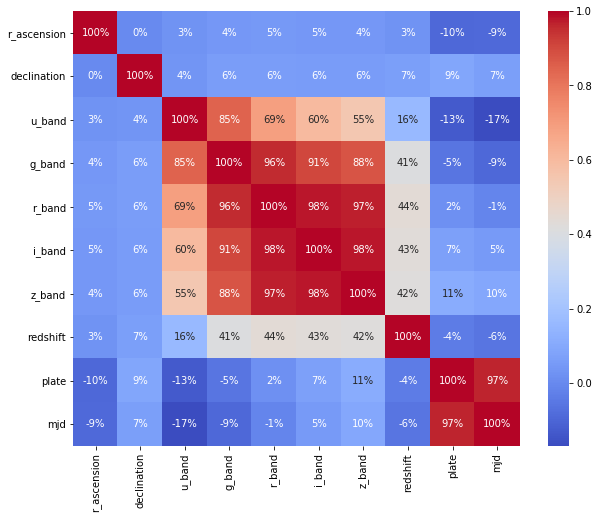

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(df1_cor,annot=True,fmt='.0%',cmap='coolwarm')
plt.show()

Observation:
    
    1-u_band, g_band, r_band, i_band, z_band columns are highly correlated with each other.
    
    2-plate and mjd columns are highly correlated with each other.
    
    3-redshift column is slightly low but positive correlated with bands column.

# Visualization

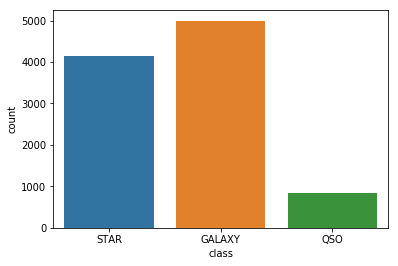

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64


In [23]:
#Checking class.
plt.subplots(figsize=(6,4))
sns.countplot(x="class", data=df1)
plt.show()

print(df1['class'].value_counts())

Observation:
    
    There are 4998 Galaxy, 4152 stars and 850 Quasar

In [24]:
df1.columns

Index(['r_ascension', 'declination', 'u_band', 'g_band', 'r_band', 'i_band',
       'z_band', 'class', 'redshift', 'plate', 'mjd'],
      dtype='object')

### Now I am going to plot the column distribution by grouping by each class.

In [25]:
melted = pd.melt(df1,id_vars=['class'],
                      value_vars=['r_ascension','declination','u_band','g_band','r_band','i_band','z_band','redshift'])
melted.head()

,class,variable,value
0,STAR,r_ascension,183.531326
1,STAR,r_ascension,183.598371
2,GALAXY,r_ascension,183.680207
3,STAR,r_ascension,183.870529
4,STAR,r_ascension,183.883288


<Figure size 432x288 with 0 Axes>

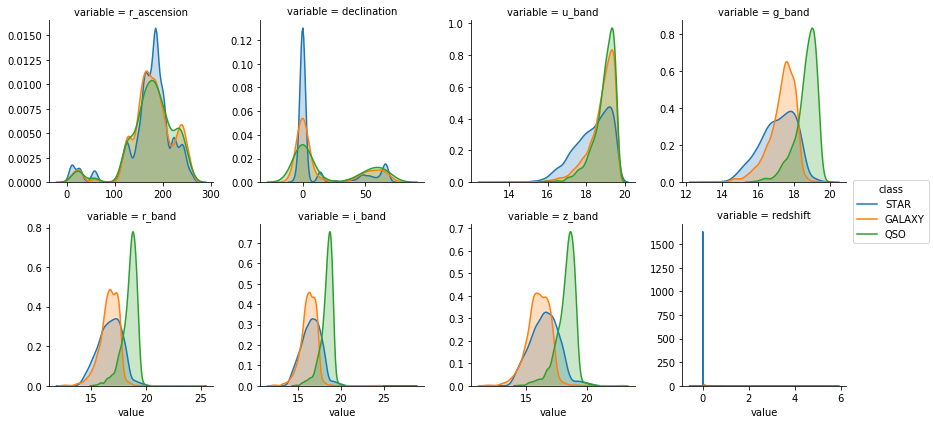

In [26]:
plt.figure(figsize=(6,4))
facet=sns.FacetGrid(melted,col='variable',hue='class',col_wrap=4,sharex=False,sharey=False,margin_titles=True)
facet=facet.map(sns.kdeplot,'value',shade=True)
facet=facet.add_legend()
plt.show()

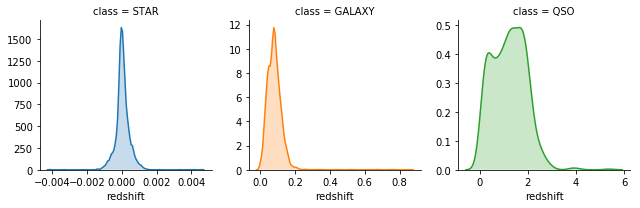

In [27]:
facet = sns.FacetGrid(df1, col='class', hue='class', margin_titles=True, sharex=False, sharey=False)
facet = facet.map(sns.kdeplot, 'redshift', shade=True)

Observation:
    
    1-As far as physical features are concerned, we can note a pretty much similar distribution across the classes for
    
      r_ascension and declination, on the other hand the quasar class shows a different distribution than the other two
    
      if we look at band features.
    
    2-redshift is a special case that needed the three classes to be displayed separately because of the spiked distribution
    
      of star class.
    
    3-Overall, I would guess that r_ascension and declination will not be very significant in classification, band features 
      
        will be more important especially to discriminate quasar and not quasar, and lastly redshift will be the most 
        
        significative one.

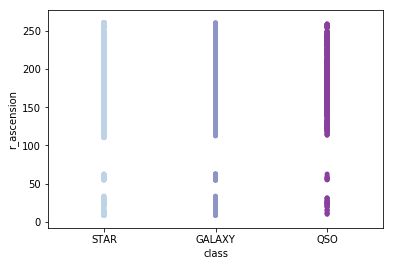

In [28]:
sns.stripplot(x="class", y="r_ascension", data=df1, palette="BuPu")

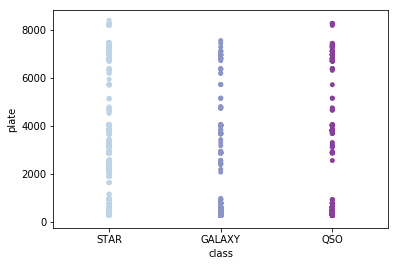

In [29]:
sns.stripplot(x="class", y="plate", data=df1, palette="BuPu")

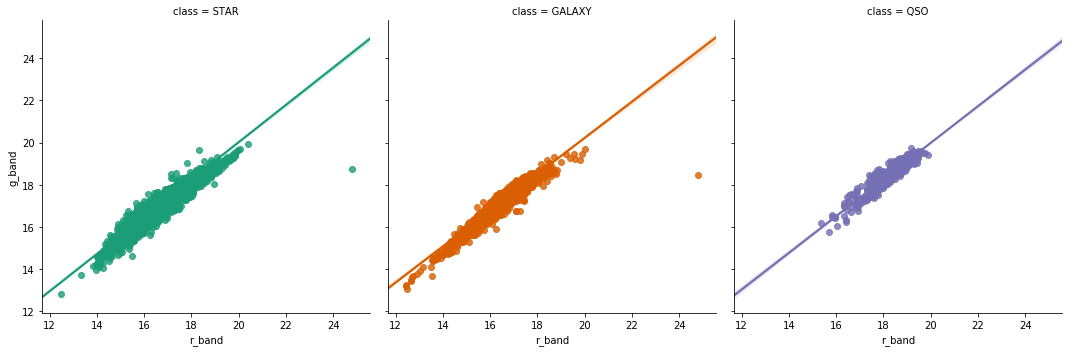

In [30]:
#lmplot
sns.lmplot(x = 'r_band', y='g_band', data = df1, hue='class', col = 'class', palette='Dark2')
plt.show()

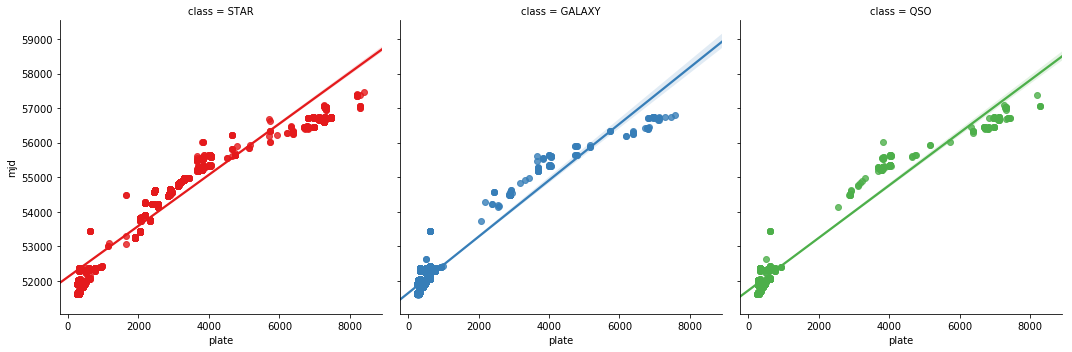

In [31]:
#lmplot
sns.lmplot(x = 'plate', y='mjd', data = df1, hue='class', col = 'class', palette='Set1')
plt.show()

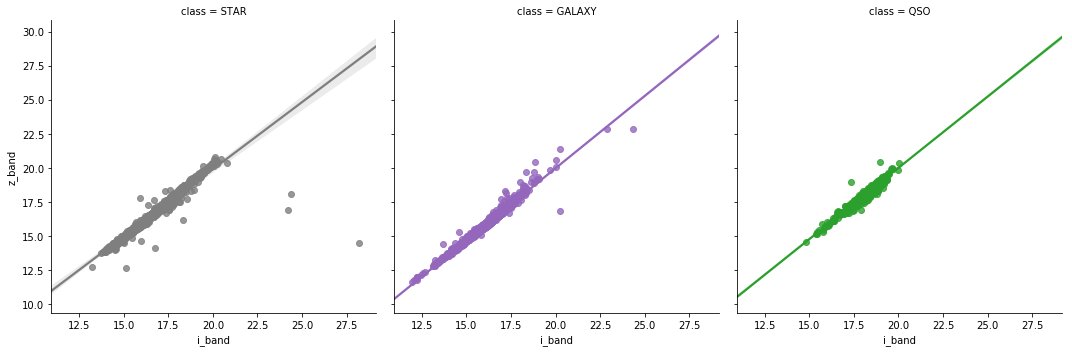

In [32]:
#lmplot
sns.lmplot(x = 'i_band', y='z_band', data = df1, hue='class', col = 'class', palette='tab10_r')
plt.show()

## To check the distribution of Skewness

In [33]:
df1.head(3)

,r_ascension,declination,u_band,g_band,r_band,i_band,z_band,class,redshift,plate,mjd
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,STAR,-0.000009,3306,54922
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,STAR,-0.000055,323,51615
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,GALAXY,0.123111,287,52023


In [34]:
df1.skew()

r_ascension   -1.227350
declination    1.191544
u_band        -1.219795
g_band        -0.536293
r_band        -0.021673
i_band         0.286442
z_band         0.214313
redshift       4.265729
plate          1.794609
mjd            1.039610
dtype: float64

In [35]:
#Lets treat the skewness
#df1.skew()
#for col in df1.skew().index:
#    if col in df1.columns:
#        if df1.skew().loc[col]>0.5:
#            df1[col]=np.sqrt(df1[col])
#       if df1.skew().loc[col]<-0.5:
#            df1[col]=np.cbrt(df1[col])

In [36]:
#df1.skew()

If we remove skewness then some of the rows in redshift columns are become NaN therefore when we are going to remove outliers then all the rows of redshift columns become NaN when we find out zscore. So when we remove outliers then all rows are removed and no rows are present in our dataset. For that reason we are not going to remove oultiers via zscore if we remove skewness.

In [37]:
df1.head(3)

,r_ascension,declination,u_band,g_band,r_band,i_band,z_band,class,redshift,plate,mjd
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,STAR,-0.000009,3306,54922
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,STAR,-0.000055,323,51615
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,GALAXY,0.123111,287,52023


## Plotting Outliers

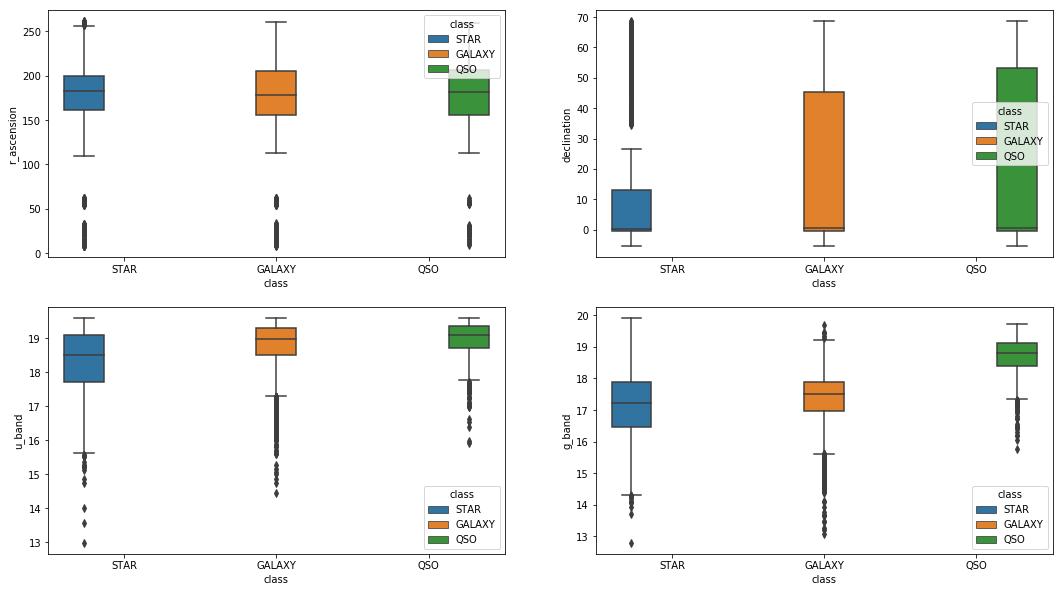

In [38]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (18, 10))
sns.boxplot(ax=ax1, x = 'class', y = 'r_ascension', hue = 'class', data = df1)
sns.boxplot(ax=ax2, x = 'class', y = 'declination', hue = 'class', data = df1)
sns.boxplot(ax=ax3, x = 'class', y = 'u_band', hue = 'class', data = df1)
sns.boxplot(ax=ax4, x = 'class', y = 'g_band', hue = 'class', data = df1)

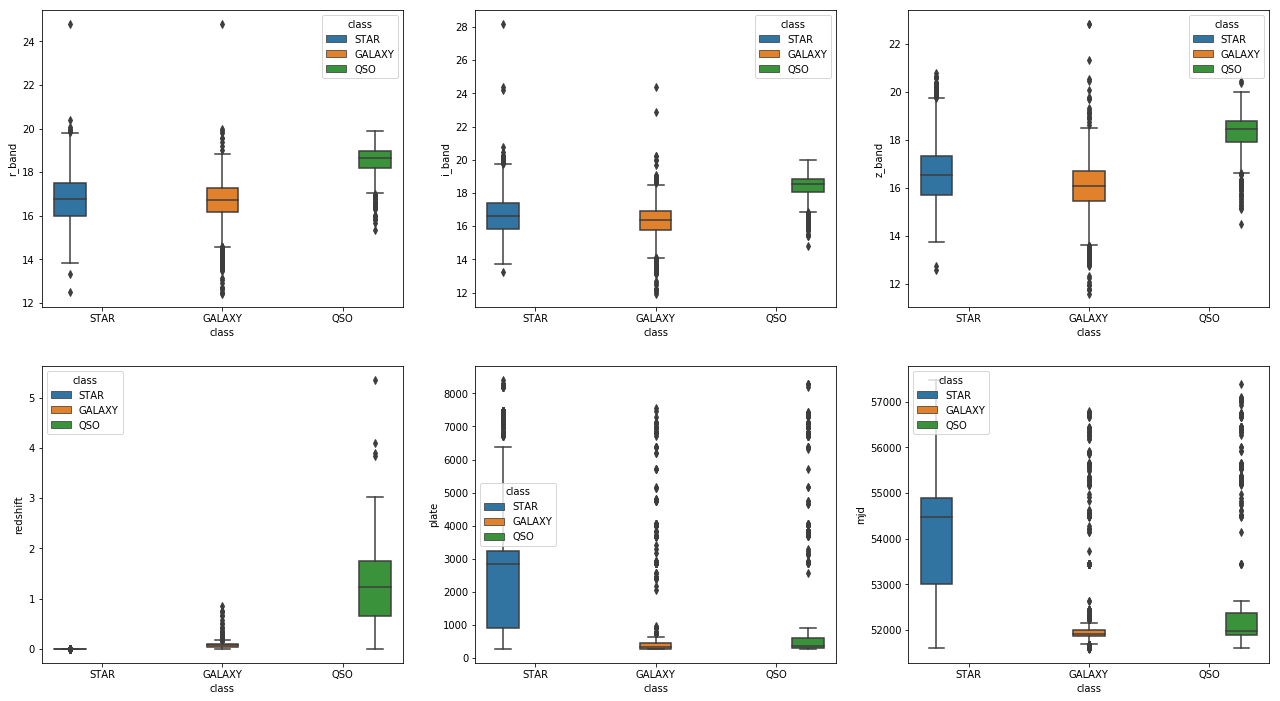

In [39]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize = (22, 12))

sns.boxplot(ax=ax1 , x = 'class', y = 'r_band', hue = 'class', data = df1)
sns.boxplot(ax=ax2 , x = 'class', y = 'i_band', hue = 'class', data = df1)
sns.boxplot(ax=ax3 , x = 'class', y = 'z_band', hue = 'class', data = df1)
sns.boxplot(ax=ax4 , x = 'class', y = 'redshift', hue = 'class', data = df1)
sns.boxplot(ax=ax5 , x = 'class', y = 'plate', hue = 'class', data = df1)
sns.boxplot(ax=ax6 , x = 'class', y = 'mjd', hue = 'class', data = df1)

### Changing Categorical features into Numeric features

In [40]:
#Changing the data type of target variable.

df1['class'] = df1['class'].map({'STAR' : 1, 'GALAXY' : 2, 'QSO': 3})
df1['class'].dtypes

dtype('int64')

In [41]:
df1.head(3)

,r_ascension,declination,u_band,g_band,r_band,i_band,z_band,class,redshift,plate,mjd
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,1,-0.000009,3306,54922
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,1,-0.000055,323,51615
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,2,0.123111,287,52023


## Removing Outliers

In [42]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

array([[0.16745842, 0.58492272, 1.03148637, ..., 0.36973112, 1.03148936,
        1.30931064],
       [0.16886159, 0.58311429, 0.05243046, ..., 0.36984929, 0.63621258,
        0.87919741],
       [0.17057433, 0.58347525, 0.92156796, ..., 0.05302706, 0.65633905,
        0.60919097],
       ...,
       [0.92039468, 1.46090664, 0.16753826, ..., 0.37074104, 3.26608697,
        2.69309363],
       [0.92197294, 1.46432109, 0.31801835, ..., 0.33364691, 0.56688806,
        0.70581092],
       [0.91804124, 1.46639319, 0.79229193, ..., 0.06510125, 0.56688806,
        0.70581092]])

In [43]:
threshold=3
print(np.where(z>3))

(array([  45,  109,  129, ..., 9992, 9994, 9997], dtype=int64), array([8, 8, 8, ..., 9, 9, 9], dtype=int64))


In [44]:
df1_new=df1[(z<3).all(axis=1)]

In [45]:
print(df1.shape,'\t\t',df1_new.shape)

(10000, 11) 		 (8713, 11)


#### All the outliers are removed.

In [46]:
df1=df1_new
df1.shape

(8713, 11)

# Model Training

In [47]:
df1.head()

,r_ascension,declination,u_band,g_band,r_band,i_band,z_band,class,redshift,plate,mjd
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,1,-0.000009,3306,54922
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,1,-0.000055,323,51615
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,2,0.123111,287,52023
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,1,-0.000111,3306,54922
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,1,0.000590,3306,54922


In [48]:
#Splitting the data into input and output variable.
x=df1.drop(columns=['class'],axis=1)
x.head()

,r_ascension,declination,u_band,g_band,r_band,i_band,z_band,redshift,plate,mjd
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,-0.000009,3306,54922
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,-0.000055,323,51615
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,0.123111,287,52023
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,-0.000111,3306,54922
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,0.000590,3306,54922


In [49]:
y=df1['class']
y.head()

0    1
1    1
2    2
3    1
4    1
Name: class, dtype: int64

In [50]:
#checking the shape of input and target variable
print(x.shape,'\t\t',y.shape)

(8713, 10) 		 (8713,)


In [51]:
#Scaling in input variables

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [52]:
#Splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42,stratify=y)

In [53]:
#Checking the shape

print(x_train.shape,'\t\t',x_test.shape)

(6970, 10) 		 (1743, 10)


In [54]:
#Checking the shape

print(y_train.shape,'\t',y_test.shape)

(6970,) 	 (1743,)


In [55]:
#Importing all the model Library

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#Importing Boosting models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Importing error metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,cross_val_score

In [56]:
# All Algorithm by using for loop

model=[LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),
       RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('*****************************************************************************************')
    print('\n')

Accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) is:
0.9713138267355135
[[692  13   0]
 [ 14 935   6]
 [  0  17  66]]
             precision    recall  f1-score   support

          1       0.98      0.98      0.98       705
          2       0.97      0.98      0.97       955
          3       0.92      0.80      0.85        83

avg / total       0.97      0.97      0.97      1743

*****************************************************************************************


Accuracy score of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) is:
0.9781985083189902
[[699   6   0]
 [ 14 9

In [57]:
#Cross Validate the models

models=[LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),
       RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]

for m in models:
    score=cross_val_score(m,x,y,cv=15,scoring='accuracy')
    print("Model:",m)
    print("Score:",score)
    print('Mean Score:',score.mean())
    print("Standard deviation:",score.std())
    print('************************************************************************************************')
    print('\n')

Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Score: [0.98109966 0.97594502 0.96563574 0.97766323 0.97079038 0.95524957
 0.95524957 0.96213425 0.97586207 0.96724138 0.94827586 0.96551724
 0.98275862 0.97241379 0.97413793]
Mean Score: 0.9686649538583972
Standard deviation: 0.009753514734875663
************************************************************************************************


Model: SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Score: [0.98109966 0.9742268  0.97079038 0.9862543  0.97766323 0.96557659
 0.97762478 0.97590361 0.98103448 0.97931034 0.96034483 0.96896552
 0.98275

### Among all models GradientBoosting model is giving best result so we finalize Gradient Boosting as our final model.

In [58]:
#GradientBoostClassifier with best result

gbc=GradientBoostingClassifier(learning_rate=0.1,random_state=59,n_estimators=200)
gbc.fit(x_train,y_train)
gbc.score(x_train,y_train)
predgbc=gbc.predict(x_test)
print(accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))

0.9902467010900746
[[705   0   0]
 [  0 949   6]
 [  0  11  72]]
             precision    recall  f1-score   support

          1       1.00      1.00      1.00       705
          2       0.99      0.99      0.99       955
          3       0.92      0.87      0.89        83

avg / total       0.99      0.99      0.99      1743



In [59]:
#Cross Validate GradientBoosting

score=cross_val_score(gbc,x,y,cv=15,scoring='accuracy')

print(score)
print('Mean:',score.mean())
print('Std:',score.std())

[0.99312715 0.9862543  0.99484536 0.98797251 0.99656357 0.98106713
 0.99139415 0.99483649 0.98965517 0.98275862 0.98103448 0.9862069
 0.99655172 0.9862069  0.98793103]
Mean: 0.9890936984441754
Std: 0.005139434691991949


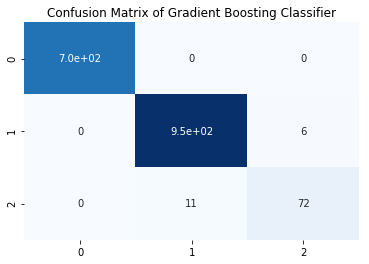

In [60]:
#Plotting Confusion Matrix for Gradient Boosting Classifier.
cm=confusion_matrix(y_test,predgbc)
sns.heatmap(cm,annot=True,cbar=False,cmap='Blues')

plt.title("Confusion Matrix of Gradient Boosting Classifier")
plt.show()

In [61]:
#Saving this model
from sklearn.externals import joblib

#Save the model as a pickle in a file
joblib.dump(gbc,'Sky_Survey_gbc.pkl')


['Sky_Survey_gbc.pkl']